In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds

In [71]:
tf.config.run_functions_eagerly(True)

# Data Preparation

In [39]:
dataset,dataset_info = tfds.load('malaria',with_info=True,as_supervised=True,split=['train'])

In [40]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear im

In [28]:
def split(data,train_ratio,val_ratio,test_ratio):
  sz = len(data)
  train_data = data.take(int(sz * train_ratio))
  val_test_data = data.skip(int(sz*train_ratio))
  val_data = val_test_data.take(int(val_ratio*sz))
  test_data = val_test_data.skip(int(val_ratio * sz))
  return train_data,val_data,test_data

In [41]:
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1
train_data,val_data,test_data = split(dataset[0],train_ratio,val_ratio,test_ratio)

In [42]:
list(train_data.take(1).as_numpy_iterator())

[(array([[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         ...,
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]], dtype=uint8),
  1)]

# Data Visualization

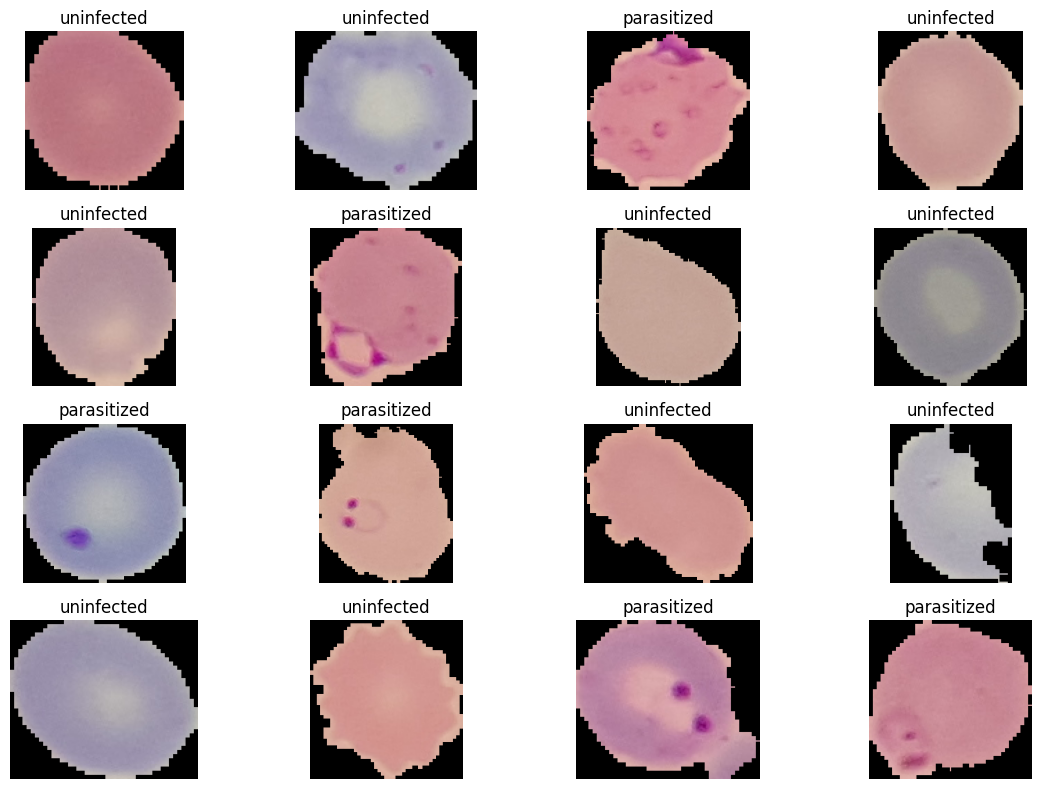

In [45]:
plt.figure(figsize=(12,8))
for i,(img,label) in enumerate(train_data.take(16)):
  plt.subplot(4,4,i+1)
  plt.imshow(img)
  plt.axis('off')
  plt.title(dataset_info.features['label'].int2str(label))
plt.tight_layout()
plt.show()

#Data Preprocessing

In [48]:
im_sz = 224
batch_sz = 32
def resize_rescale(img,label):
  return tf.image.resize(img,(im_sz,im_sz))/255.,label

In [49]:
train_data = train_data.map(resize_rescale)

In [58]:
val_data = val_data.map(resize_rescale)

In [59]:
test_data = test_data.map(resize_rescale)

In [67]:
train_data_batched = train_data.batch(32)
train_data_batched

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [68]:
val_data_batched = val_data.batch(32)

In [52]:
for img,label in train_data.take(1):
  print(img,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
# train_data = train_data.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# val_data = val_data.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# test_data = test_data.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',strides=1,input_shape=(im_sz,im_sz,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=10,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 batch_normalization_6 (Bat  (None, 222, 222, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 batch_normalization_7 (Bat  (None, 109, 109, 32)      128       
 chNormalization)                                                
                                                      

In [74]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [75]:
history = model.fit(train_data_batched,validation_data=val_data_batched,epochs=10,batch_size=batch_sz)

Epoch 1/10
689/689 [==============================] - 88s 127ms/step - loss: 0.4068 - accuracy: 0.8169 - val_loss: 0.5796 - val_accuracy: 0.7514
Epoch 2/10
689/689 [==============================] - 87s 126ms/step - loss: 0.2214 - accuracy: 0.9198 - val_loss: 0.2521 - val_accuracy: 0.9053
Epoch 3/10
689/689 [==============================] - 97s 141ms/step - loss: 0.1813 - accuracy: 0.9358 - val_loss: 0.1866 - val_accuracy: 0.9318
Epoch 4/10
689/689 [==============================] - 96s 139ms/step - loss: 0.1452 - accuracy: 0.9481 - val_loss: 0.2584 - val_accuracy: 0.8878
Epoch 5/10
689/689 [==============================] - 87s 126ms/step - loss: 0.1260 - accuracy: 0.9534 - val_loss: 0.1742 - val_accuracy: 0.9361
Epoch 6/10
689/689 [==============================] - 88s 128ms/step - loss: 0.0772 - accuracy: 0.9748 - val_loss: 0.1517 - val_accuracy: 0.9434
Epoch 7/10
689/689 [==============================] - 87s 126ms/step - loss: 0.0397 - accuracy: 0.9880 - val_loss: 0.2009 - val_ac

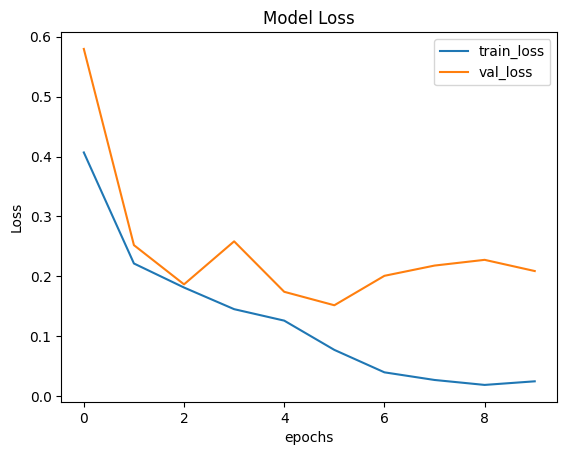

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train_loss','val_loss'])
plt.show()

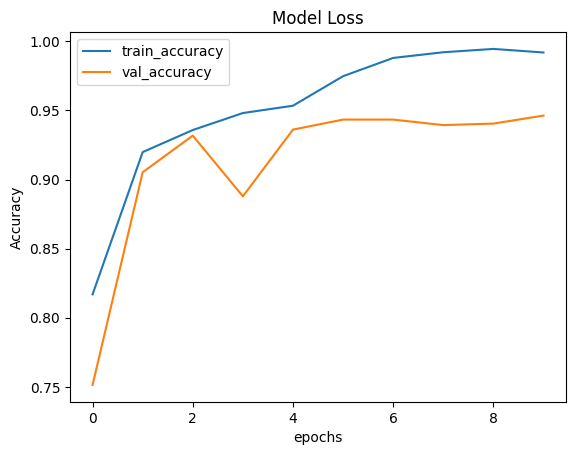

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Loss")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

In [80]:
test_data_batched = test_data.batch(1)

In [81]:
model.evaluate(test_data_batched)

2757/2757 [==============================] - 68s 21ms/step - loss: 0.2475 - accuracy: 0.9438


[0.24745707213878632, 0.943779468536377]

In [87]:
list(test_data_batched.take(2).as_numpy_iterator())

[(array([[[[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.],
           ...,
           [0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]],
  
          [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.],
           ...,
           [0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]],
  
          [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.],
           ...,
           [0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]],
  
          ...,
  
          [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.],
           ...,
           [0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]],
  
          [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.],
           ...,
           [0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]],
  
          [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.],
           ...,
           [0., 0., 0.],
           [0., 

In [89]:
def pred(x):
  if x >= 0.5:
    return dataset_info.features['label'].int2str(1)
  else:
    return dataset_info.features['label'].int2str(0)

1/1 [==============================] - 0s 27ms/step


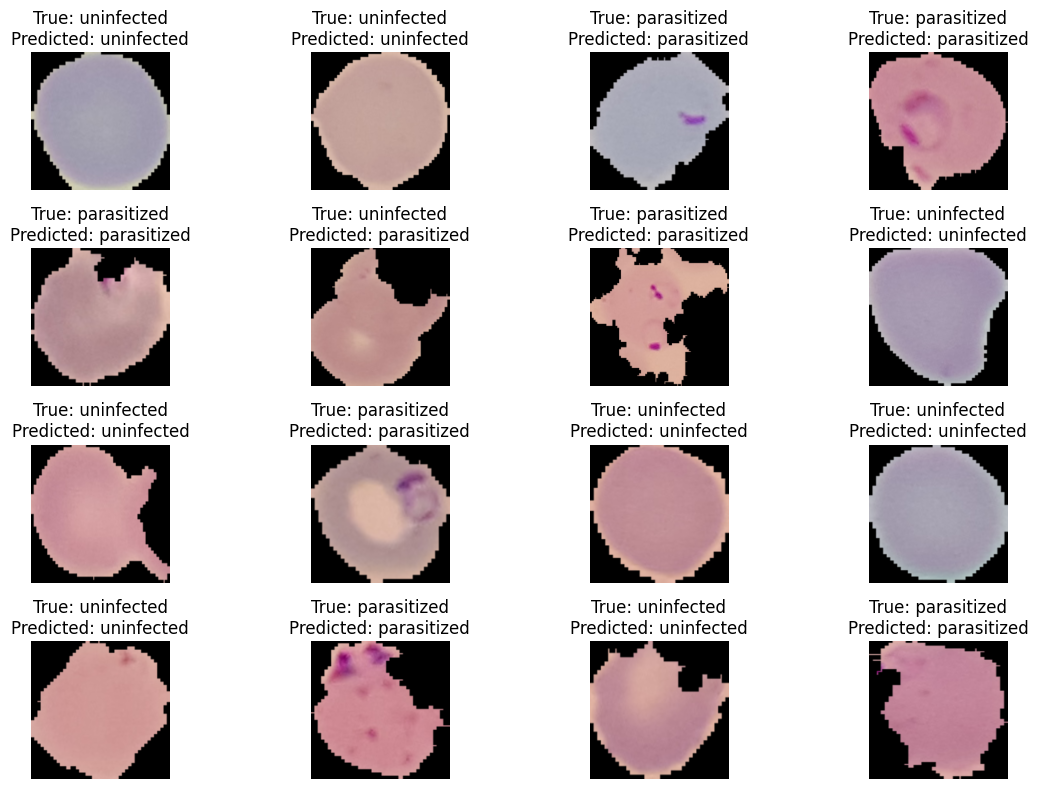

In [96]:
plt.figure(figsize=(12,8))
for i, (img,label) in enumerate(test_data_batched.take(16)):
  plt.subplot(4,4,i+1)
  plt.imshow(img[0])
  plt.axis('off')
  l2 = model.predict(img)[0][0]
  plt.title(f"True: {dataset_info.features['label'].int2str(label[0])}\nPredicted: {pred(l2)}")
plt.tight_layout()
plt.show()

In [99]:
model_json = model.to_json()
with open('malaria.json','w') as f:
  f.write(model_json)
model.save_weights("malaria.h5")